In [ ]:
#!pip install tensorflow pandas numpy

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_lables), (test_images, test_lables)= datasets.cifar10.load_data()

train_images, test_images= train_images/255.0, test_images/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


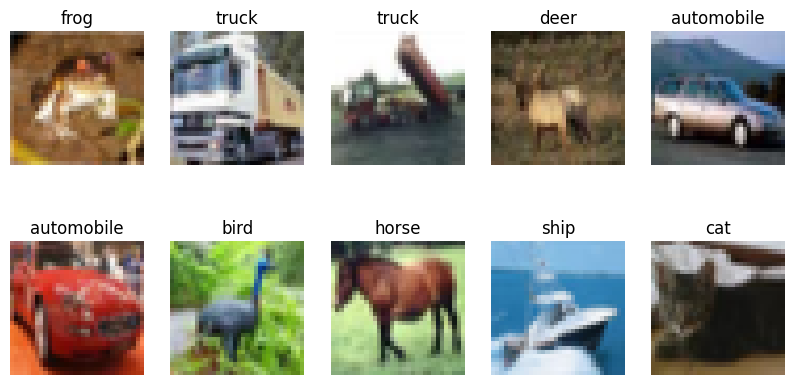

In [ ]:
#optional
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i] )
    plt.title(class_names[train_lables[i][0]])
    plt.axis('off')
plt.show()

In [ ]:
model= models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='tanh'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
optimizer= optimizers.SGD (learning_rate=0.001, momentum=0.9)
#optimizer = optimizers.Adam(learning_rate=0.001, beta_1= 0.9, beta_2 = 0.999)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images, train_lables, epochs=10, batch_size=128, validation_data=(test_images, test_lables))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.5320 - loss: 1.3289 - val_accuracy: 0.5089 - val_loss: 1.3894
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.5314 - loss: 1.3216 - val_accuracy: 0.5015 - val_loss: 1.3950
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.5405 - loss: 1.2997 - val_accuracy: 0.5025 - val_loss: 1.3968
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.5479 - loss: 1.2883 - val_accuracy: 0.5150 - val_loss: 1.3678
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.5518 - loss: 1.2761 - val_accuracy: 0.5104 - val_loss: 1.3704
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.5555 - loss: 1.2586 - val_accuracy: 0.5069 - val_loss: 1.3793
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.5568 - loss: 1.2593 - val_accuracy: 0.5182 - val_loss: 1.3582
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.5635 - loss: 1.2374 - 

In [ ]:
test_loss, test_acc= model.evaluate(test_images, test_lables, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 2s - 6ms/step - accuracy: 0.5021 - loss: 1.4013
Test accuracy: 0.5020999908447266


In [ ]:
#optional
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer


lb = LabelBinarizer()
train_labels= lb.fit_transform(test_lables)
test_labels = lb.transform(test_lables)
predictions = model.predict(test_images, batch_size=128)


print(classification_report(test_labels.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=[str(x) for x in lb.classes_]))


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
              precision    recall  f1-score   support

           0       0.55      0.60      0.57      1000
           1       0.63      0.58      0.60      1000
           2       0.39      0.30      0.34      1000
           3       0.40      0.21      0.27      1000
           4       0.38      0.55      0.44      1000
           5       0.47      0.34      0.39      1000
           6       0.50      0.60      0.55      1000
           7       0.53      0.59      0.56      1000
           8       0.61      0.66      0.63      1000
           9       0.53      0.60      0.56      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.50      0.49     10000



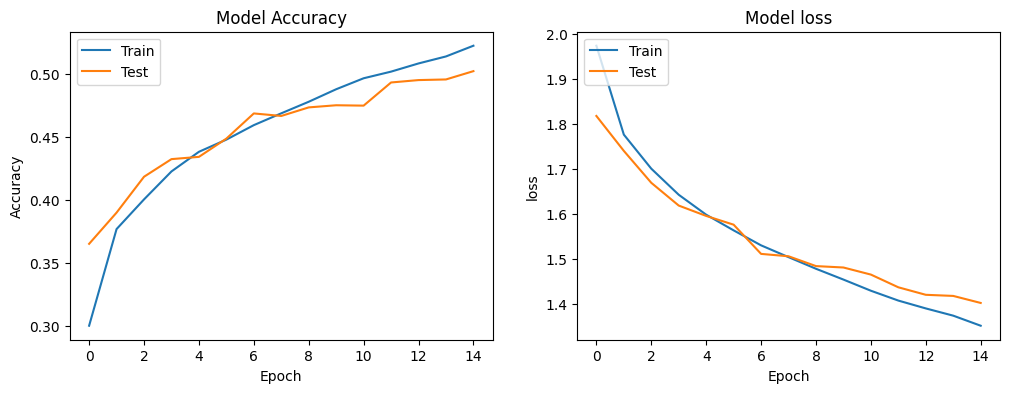

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')


plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()